In [1]:
# Set plot size (for jupyter notebook)
options(repr.plot.width  = 4, repr.plot.height = 3)

mats17

In [2]:
mats17

ERROR: Error in eval(expr, envir, enclos): object 'mats17' not found


In [3]:
library(RColorBrewer)
source('h_mdt.R')

library(ltm)
library(mirt)
library(xtable)
library(reshape2)
library(ggplot2)
theme_set(theme_bw())
library(ggrepel)
library(ggpubr)
source('f_IRT.R')

source('h_gpcmcoef.R')

Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, env

Iteration: 33, Log-Lik: -46137.828, Max-Change: 0.00007
Iteration: 32, Log-Lik: -13852.077, Max-Change: 0.00005
Iteration: 38, Log-Lik: -12819.055, Max-Change: 0.00006
Iteration: 34, Log-Lik: -16330.921, Max-Change: 0.00004
Iteration: 40, Log-Lik: -29186.763, Max-Change: 0.00006


In [4]:
library(psych)
library(plyr)

Warning message:
"package 'psych' was built under R version 3.5.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

The following object is masked from 'package:ltm':

    factor.scores

The following object is masked from 'package:polycor':

    polyserial

Warning message:
"package 'plyr' was built under R version 3.5.2"
Attaching package: 'plyr'

The following object is masked from 'package:ggpubr':

    mutate



In [5]:
## ----- Section 4.2.1 Local independence -----
# Explore degree of pairwise associations
if (file.exists('../robject/IMPRV_cortest17.Rdata')) {
  load('../robject/IMPRV_cortest17.Rdata')
} else {
  cortest17 <- rcor.test(mdt17_clean[1:20], method="kendall")
  save(cortest17, file="../robject/IMPRV_cortest17.Rdata")
}
cortest17_sorted <- as.data.frame(cortest17$p.values[order(-cortest17$p.values[,'pvals']),])
cortest17_sorted[,1:2] <- apply(cortest17_sorted[,1:2], c(1,2), function (x) {
    group_17$Item[x]
})
# LaTeX: tab:IMPRV_cortest
print(xtable(cortest17_sorted[1:6,], digits=c(0,0,0,4), align=rep('c',4)), include.rownames=F)

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Mon Jun 17 07:33:28 2019
\begin{table}[ht]
\centering
\begin{tabular}{ccc}
  \hline
V1 & V2 & pvals \\ 
  \hline
Q1 & Q15 & 0.0907 \\ 
  Q3 & Q18 & 0.0351 \\ 
  N11 & Q18 & 0.0273 \\ 
  N7 & Q17 & 0.0265 \\ 
  Q1 & Q17 & 0.0160 \\ 
  Q7 & Q17 & 0.0141 \\ 
   \hline
\end{tabular}
\end{table}


In [6]:
# cor.test(c(mdt13_clean[,1]), c(mdt13_clean[,15]), method='kendall')
# cor.test(c(mdt14_clean[,1]), c(mdt14_clean[,15]), method='kendall')
# cor.test(c(mdt15_clean[,1]), c(mdt15_clean[,15]), method='kendall')
# cor.test(c(mdt16_clean[,1]), c(mdt16_clean[,15]), method='kendall')
# cor.test(c(mdt17_clean[,1]), c(mdt17_clean[,15]), method='kendall')

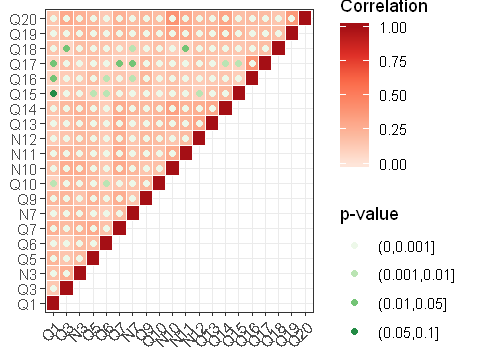

In [7]:
# pdf('../fig/IMPRV_cor_17.pdf', width=7, height=6)
mycor_plot(cortest17, group_17)
# dev.off()

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 


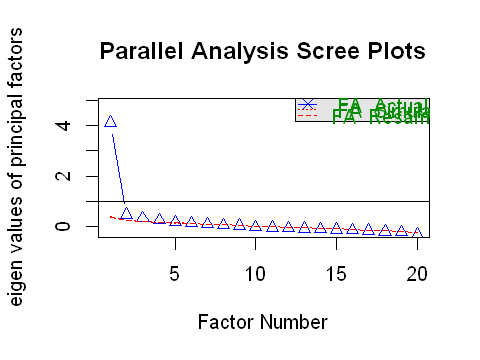

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 


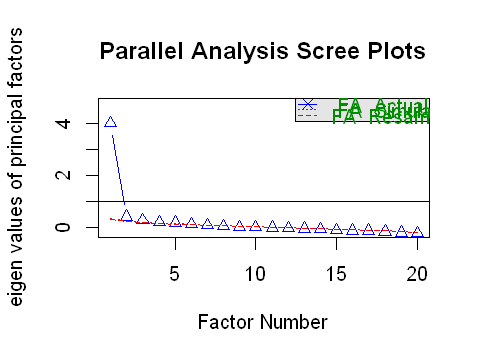

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 


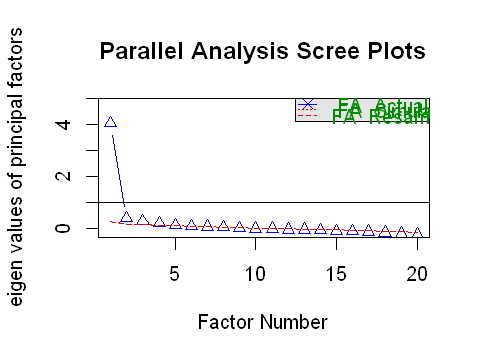

In [8]:
## ----- Section 4.2.2 Dimensionality -----
# pdf('../fig/IMPRV_EFA_scree.pdf', width=7, height=4)
fp_17 <- fa.parallel(mdt17_clean[1:20], fm='minres', fa='fa')
fp_18 <- fa.parallel(mdt18_clean[1:20], fm='minres', fa='fa')
fp_mdt3 <- fa.parallel(MDT3clean[1:20], fm='minres', fa='fa')
# dev.off()

In [9]:
# 1 factor
(efa_17_1 <- fa(mdt17_clean[1:20], nfactors = 1))
(efa_mdt3_1 <- fa(MDT3clean[1:20], nfactors = 1))

Factor Analysis using method =  minres
Call: fa(r = mdt17_clean[1:20], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR1    h2   u2 com
Q1  0.32 0.103 0.90   1
Q3  0.44 0.191 0.81   1
N3  0.52 0.275 0.73   1
Q5  0.44 0.195 0.81   1
Q6  0.31 0.095 0.91   1
Q7  0.52 0.272 0.73   1
N7  0.37 0.141 0.86   1
Q9  0.46 0.211 0.79   1
Q10 0.44 0.190 0.81   1
N10 0.60 0.358 0.64   1
N11 0.49 0.236 0.76   1
N12 0.47 0.218 0.78   1
Q13 0.49 0.245 0.76   1
Q14 0.57 0.330 0.67   1
Q15 0.33 0.107 0.89   1
Q16 0.35 0.124 0.88   1
Q17 0.34 0.114 0.89   1
Q18 0.32 0.103 0.90   1
Q19 0.54 0.287 0.71   1
Q20 0.56 0.309 0.69   1

                MR1
SS loadings    4.10
Proportion Var 0.21

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  190  and the objective function was  3.38 with Chi Square of  3003.58
The degrees of freedom for the model are 170  and the objective function was  0.55 


Factor Analysis using method =  minres
Call: fa(r = MDT3clean[1:20], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR1    h2   u2 com
Q1  0.28 0.081 0.92   1
Q3  0.46 0.211 0.79   1
N3  0.56 0.314 0.69   1
Q5  0.43 0.185 0.82   1
Q6  0.34 0.117 0.88   1
Q7  0.51 0.258 0.74   1
N7  0.37 0.138 0.86   1
Q9  0.42 0.175 0.82   1
Q10 0.43 0.189 0.81   1
N10 0.56 0.319 0.68   1
N11 0.48 0.229 0.77   1
N12 0.44 0.196 0.80   1
Q13 0.49 0.240 0.76   1
Q14 0.60 0.365 0.64   1
Q15 0.30 0.092 0.91   1
Q16 0.34 0.114 0.89   1
Q17 0.34 0.118 0.88   1
Q18 0.35 0.122 0.88   1
Q19 0.53 0.277 0.72   1
Q20 0.55 0.306 0.69   1

                MR1
SS loadings    4.05
Proportion Var 0.20

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  190  and the objective function was  3.14 with Chi Square of  6341.35
The degrees of freedom for the model are 170  and the objective function was  0.36 

T

In [10]:
efa_mdt3_1_load <- data.frame(Type=group_17$Type, MR1=efa_mdt3_1$loadings[,1])
efa_mdt3_1_load$sig[efa_mdt3_1_load$MR1 > 0.25] <- "*"

efa_mdt3_1_load[order(efa_mdt3_1_load$MR1),]

# LaTeX: tab:IMPRV_EFA_17_1
print(xtable(efa_mdt3_1_load[1:10,], digits=c(0,0,3,0), align=c('l','c','c','c')))
print(xtable(efa_mdt3_1_load[11:20,], digits=c(0,0,3,0), align=c('l','c','c','c')))

,Type,MR1,sig
,<fct>,<dbl>,<chr>
Q1,A,0.2849570,*
Q15,A,0.3039083,*
Q16,A,0.3382671,*
Q6,A,0.3413258,*
Q17,A,0.3427847,*
Q18,A,0.3498091,*
N7,B,0.3708712,*
Q9,A,0.4185546,*
Q5,A,0.4298724,*


% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:20:48 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
Q1 & A & 0.285 & * \\ 
  Q3 & B & 0.460 & * \\ 
  N3 & A & 0.560 & * \\ 
  Q5 & A & 0.430 & * \\ 
  Q6 & A & 0.341 & * \\ 
  Q7 & B & 0.508 & * \\ 
  N7 & B & 0.371 & * \\ 
  Q9 & A & 0.419 & * \\ 
  Q10 & B & 0.435 & * \\ 
  N10 & B & 0.565 & * \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:20:48 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
N11 & C & 0.479 & * \\ 
  N12 & A & 0.443 & * \\ 
  Q13 & A & 0.490 & * \\ 
  Q14 & B & 0.604 & * \\ 
  Q15 & A & 0.304 & * \\ 
  Q16 & A & 0.338 & * \\ 
  Q17 & A & 0.343 & * \\ 
  Q18 & A & 0.350 & * \\ 
  Q19 & B & 0.526 & * \\ 
  Q20 & B & 0.553 & * \\ 
   \hline
\end{tabular}
\end{table}


In [11]:
efa_17_1_load <- data.frame(Type=group_17$Type, MR1=efa_17_1$loadings[,1])
efa_17_1_load$sig[efa_17_1_load$MR1 > 0.25] <- "*"
# LaTeX: tab:IMPRV_EFA_17_1
print(xtable(efa_17_1_load[1:10,], digits=c(0,0,3,0), align=c('l','c','c','c')))
print(xtable(efa_17_1_load[11:20,], digits=c(0,0,3,0), align=c('l','c','c','c')))

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:20:54 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
Q1 & A & 0.322 & * \\ 
  Q3 & B & 0.437 & * \\ 
  N3 & A & 0.524 & * \\ 
  Q5 & A & 0.441 & * \\ 
  Q6 & A & 0.308 & * \\ 
  Q7 & B & 0.521 & * \\ 
  N7 & B & 0.375 & * \\ 
  Q9 & A & 0.459 & * \\ 
  Q10 & B & 0.436 & * \\ 
  N10 & B & 0.598 & * \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:20:54 2019
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & sig \\ 
  \hline
N11 & C & 0.486 & * \\ 
  N12 & A & 0.467 & * \\ 
  Q13 & A & 0.495 & * \\ 
  Q14 & B & 0.575 & * \\ 
  Q15 & A & 0.328 & * \\ 
  Q16 & A & 0.352 & * \\ 
  Q17 & A & 0.338 & * \\ 
  Q18 & A & 0.321 & * \\ 
  Q19 & B & 0.536 & * \\ 
  Q20 & B & 0.556 & * \\ 
   \hline
\end{tabular}
\end{table}


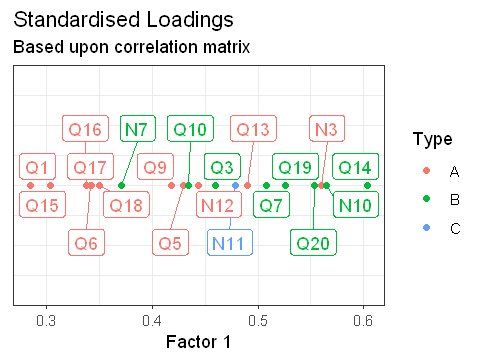

In [22]:
#pdf("../fig/IMPRV_EFA_mdt3_1.pdf", width=7, height=2)
ggplot(efa_mdt3_1_load, aes(x=MR1, y=rep(0,20), color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_mdt3_1_load)), show.legend=F) +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
  labs(x='Factor 1', 
       title='Standardised Loadings', 
       subtitle='Based upon correlation matrix')
#dev.off()

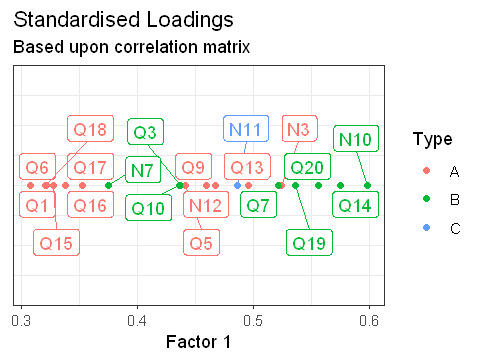

In [21]:
# pdf("../fig/IMPRV_EFA_17_1.pdf", width=7, height=2)
ggplot(efa_17_1_load, aes(x=MR1, y=rep(0,20), color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_17_1_load)), show.legend=F) +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + 
  labs(x='Factor 1', 
       title='Standardised Loadings', 
       subtitle='Based upon correlation matrix')
# dev.off()

In [14]:
# 2 factor
(efa_17_2 <- fa(mdt17_clean[1:20], nfactors = 2))
(efa_18_2 <- fa(mdt18_clean[1:20], nfactors = 2))
(efa_mdt3_2 <- fa(MDT3clean[1:20], nfactors = 2))

Factor Analysis using method =  minres
Call: fa(r = mdt17_clean[1:20], nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
      MR1   MR2    h2   u2 com
Q1   0.33 -0.01 0.107 0.89 1.0
Q3   0.42  0.04 0.191 0.81 1.0
N3   0.50  0.05 0.274 0.73 1.0
Q5   0.38  0.11 0.194 0.81 1.2
Q6   0.28  0.06 0.094 0.91 1.1
Q7   0.58 -0.08 0.300 0.70 1.0
N7   0.41 -0.05 0.152 0.85 1.0
Q9   0.36  0.20 0.222 0.78 1.6
Q10  0.37  0.13 0.191 0.81 1.2
N10  0.64 -0.06 0.386 0.61 1.0
N11  0.51 -0.03 0.247 0.75 1.0
N12  0.41  0.12 0.218 0.78 1.2
Q13  0.48  0.04 0.246 0.75 1.0
Q14  0.62 -0.07 0.359 0.64 1.0
Q15  0.31  0.04 0.107 0.89 1.0
Q16  0.09  0.51 0.303 0.70 1.1
Q17 -0.02  0.70 0.483 0.52 1.0
Q18  0.21  0.21 0.123 0.88 2.0
Q19  0.50  0.07 0.286 0.71 1.0
Q20  0.53  0.05 0.309 0.69 1.0

                       MR1  MR2
SS loadings           3.76 1.03
Proportion Var        0.19 0.05
Cumulative Var        0.19 0.24
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

 

Factor Analysis using method =  minres
Call: fa(r = mdt18_clean[1:20], nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR1   MR2    h2   u2 com
Q1  0.17  0.13 0.070 0.93 1.9
Q3  0.48  0.02 0.235 0.77 1.0
N3  0.53  0.10 0.345 0.66 1.1
Q5  0.40  0.05 0.179 0.82 1.0
Q6  0.39 -0.02 0.143 0.86 1.0
Q7  0.55 -0.06 0.272 0.73 1.0
N7  0.46 -0.14 0.173 0.83 1.2
Q9  0.31  0.12 0.149 0.85 1.3
Q10 0.43  0.02 0.191 0.81 1.0
N10 0.64 -0.14 0.346 0.65 1.1
N11 0.47  0.02 0.229 0.77 1.0
N12 0.31  0.18 0.187 0.81 1.6
Q13 0.44  0.09 0.235 0.76 1.1
Q14 0.58  0.09 0.394 0.61 1.1
Q15 0.16  0.20 0.096 0.90 1.9
Q16 0.10  0.38 0.186 0.81 1.1
Q17 0.00  0.57 0.328 0.67 1.0
Q18 0.15  0.36 0.204 0.80 1.4
Q19 0.39  0.21 0.276 0.72 1.5
Q20 0.53  0.05 0.306 0.69 1.0

                       MR1  MR2
SS loadings           3.56 0.98
Proportion Var        0.18 0.05
Cumulative Var        0.18 0.23
Proportion Explained  0.78 0.22
Cumulative Proportion 0.78 1.00

 With factor correlati

Factor Analysis using method =  minres
Call: fa(r = MDT3clean[1:20], nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
      MR1   MR2    h2   u2 com
Q1   0.25  0.07 0.081 0.92 1.1
Q3   0.46  0.01 0.215 0.79 1.0
N3   0.53  0.06 0.313 0.69 1.0
Q5   0.39  0.08 0.184 0.82 1.1
Q6   0.33  0.02 0.118 0.88 1.0
Q7   0.55 -0.06 0.280 0.72 1.0
N7   0.44 -0.10 0.162 0.84 1.1
Q9   0.33  0.15 0.179 0.82 1.4
Q10  0.40  0.06 0.188 0.81 1.1
N10  0.65 -0.11 0.364 0.64 1.1
N11  0.49  0.00 0.236 0.76 1.0
N12  0.36  0.14 0.199 0.80 1.3
Q13  0.47  0.05 0.240 0.76 1.0
Q14  0.61  0.01 0.373 0.63 1.0
Q15  0.23  0.12 0.096 0.90 1.5
Q16  0.09  0.44 0.237 0.76 1.1
Q17 -0.01  0.63 0.390 0.61 1.0
Q18  0.18  0.29 0.164 0.84 1.7
Q19  0.45  0.13 0.276 0.72 1.2
Q20  0.53  0.05 0.308 0.69 1.0

                       MR1  MR2
SS loadings           3.67 0.93
Proportion Var        0.18 0.05
Cumulative Var        0.18 0.23
Proportion Explained  0.80 0.20
Cumulative Proportion 0.80 1.00

 Wi

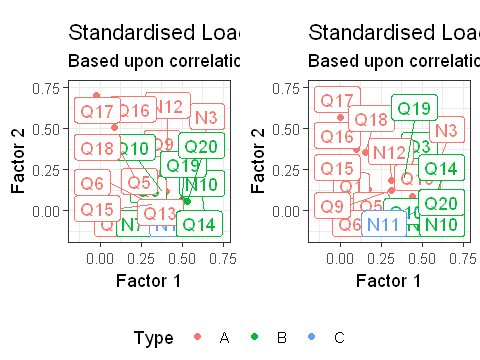

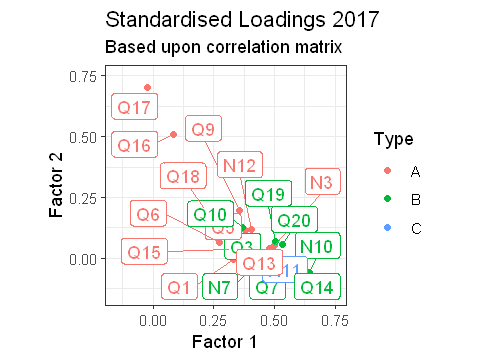

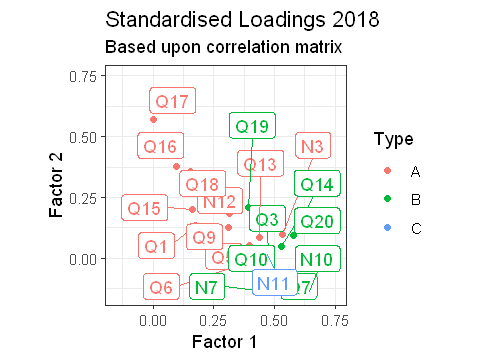

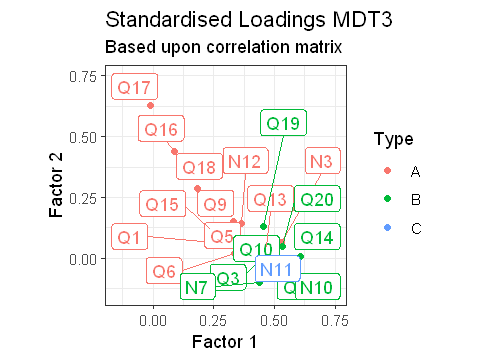

In [15]:
efa_17_2_load <- data.frame(Type=group_17$Type, MR1=efa_17_2$loadings[,1], MR2=efa_17_2$loadings[,2])
efa_18_2_load <- data.frame(Type=group_18$Type, MR1=efa_18_2$loadings[,1], MR2=efa_18_2$loadings[,2])
efa_mdt3_2_load <- data.frame(Type=group_17$Type, MR1=efa_mdt3_2$loadings[,1], MR2=efa_mdt3_2$loadings[,2])
# pdf("../fig/IMPRV_EFA_17_2.pdf", width=7, height=5)
p1 = ggplot(efa_17_2_load, aes(x=MR1, y=MR2, color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_17_2_load)), show.legend=F) + 
  coord_fixed() + 
  scale_y_continuous(limits=c(-0.15,0.75)) + 
  scale_x_continuous(limits=c(-0.15,0.75)) + 
  labs(x='Factor 1', y='Factor 2', 
       title='Standardised Loadings 2017', 
       subtitle='Based upon correlation matrix')
p2 = ggplot(efa_18_2_load, aes(x=MR1, y=MR2, color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_18_2_load)), show.legend=F) + 
  coord_fixed() + 
  scale_y_continuous(limits=c(-0.15,0.75)) + 
  scale_x_continuous(limits=c(-0.15,0.75)) + 
  labs(x='Factor 1', y='Factor 2', 
       title='Standardised Loadings 2018', 
       subtitle='Based upon correlation matrix')
ggarrange(p1, p2, common.legend=T, legend='bottom')
p1
p2
ggplot(efa_mdt3_2_load, aes(x=MR1, y=MR2, color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_mdt3_2_load)), show.legend=F) + 
  coord_fixed() + 
  scale_y_continuous(limits=c(-0.15,0.75)) + 
  scale_x_continuous(limits=c(-0.15,0.75)) + 
  labs(x='Factor 1', y='Factor 2', 
       title='Standardised Loadings MDT3', 
       subtitle='Based upon correlation matrix')
# dev.off()

In [19]:
pdf("../fig/IMPRV_EFA_mdt3_2.pdf", width=7, height=5)
ggplot(efa_mdt3_2_load, aes(x=MR1, y=MR2, color=Type)) + 
  geom_point() + 
  geom_label_repel(aes(label = rownames(efa_mdt3_2_load)), show.legend=F) + 
  coord_fixed() + 
  scale_y_continuous(limits=c(-0.15,0.75)) + 
  scale_x_continuous(limits=c(-0.15,0.75)) + 
  labs(x='Factor 1', y='Factor 2', 
       title='Standardised Loadings MDT3', 
       subtitle='Based upon correlation matrix')
dev.off()

png 
  2

In [13]:
efa_17_2_load[efa_17_2_load < 0.25] <- NA
# LaTeX: tab:IMPRV_EFA_17_2
print(xtable(efa_17_2_load[1:10,], digits=c(0,0,3,3), align=c('l','c','c','c')))
print(xtable(efa_17_2_load[11:20,], digits=c(0,0,3,3), align=c('l','c','c','c')))

Warning message in Ops.factor(left, right):
“‘<’ not meaningful for factors”

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Fri Oct  5 11:08:23 2018
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & MR2 \\ 
  \hline
Q1 & A & 0.329 &  \\ 
  Q3 & B & 0.418 &  \\ 
  N3 & A & 0.500 &  \\ 
  Q5 & A & 0.382 &  \\ 
  Q6 & A & 0.275 &  \\ 
  Q7 & B & 0.575 &  \\ 
  N7 & B & 0.407 &  \\ 
  Q9 & A & 0.355 &  \\ 
  Q10 & B & 0.370 &  \\ 
  N10 & B & 0.643 &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Fri Oct  5 11:08:23 2018
\begin{table}[ht]
\centering
\begin{tabular}{lccc}
  \hline
 & Type & MR1 & MR2 \\ 
  \hline
N11 & C & 0.507 &  \\ 
  N12 & A & 0.405 &  \\ 
  Q13 & A & 0.479 &  \\ 
  Q14 & B & 0.624 &  \\ 
  Q15 & A & 0.311 &  \\ 
  Q16 & A &  & 0.511 \\ 
  Q17 & A &  & 0.704 \\ 
  Q18 & A &  &  \\ 
  Q19 & B & 0.503 &  \\ 
  Q20 & B & 0.532 &  \\ 
   \hline
\end{tabular}
\end{table}


In [16]:
## ----- Section 4.3 Separate calibration -----
(fit_17 <- suppressMessages(mirt(round(mdt17_clean[1:20]*multi), 1, itemtype="gpcm", SE=T, gpcm_mats = mats17)))
(fit_mdt3 <- suppressMessages(mirt(round(MDT3clean[1:20]*multi), 1, itemtype="gpcm", SE=T, gpcm_mats = matsMDT3)))

Iteration: 38, Log-Lik: -12819.055, Max-Change: 0.00006


Calculating information matrix...



Call:
mirt(data = round(mdt17_clean[1:20] * multi), model = 1, itemtype = "gpcm", 
    SE = T, gpcm_mats = mats17)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 38 EM iterations.
mirt version: 1.30 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Information matrix estimated with method: Oakes
Condition number of information matrix = 113527.9
Second-order test: model is a possible local maximum

Log-likelihood = -12819.05
Estimated parameters: 70 
AIC = 25778.11; AICc = 25790.16
BIC = 26113.96; SABIC = 25891.66
G2 (7166361529) = 13640.18, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

Iteration: 40, Log-Lik: -29186.763, Max-Change: 0.00006


Calculating information matrix...



Call:
mirt(data = round(MDT3clean[1:20] * multi), model = 1, itemtype = "gpcm", 
    SE = T, gpcm_mats = matsMDT3)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 40 EM iterations.
mirt version: 1.30 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Information matrix estimated with method: Oakes
Condition number of information matrix = 125544.5
Second-order test: model is a possible local maximum

Log-likelihood = -29186.76
Estimated parameters: 70 
AIC = 58513.53; AICc = 58518.61
BIC = 58906.56; SABIC = 58684.17
G2 (7166361529) = 28235.34, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [23]:
coef(fit_17)[1:36]
extract.mirt(fit_17, 'K')

$Q1
            a1 ak0_1 ak1_1 ak2_1 d0         d1       d2
par 0.02859799     0    20    40  0 -0.4172848 2.730558

$Q3
            a1 ak0_1 ak1_1 d0       d1
par 0.02978893     0    40  0 1.219144

$N3
            a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 d0       d1       d2       d3
par 0.06302231     0    10    20    30    40  0 1.129355 2.247223 2.883002
          d4
par 4.146112

$Q5
           a1 ak0_1 ak1_1 d0       d1
par 0.0319545     0    40  0 1.750664

$Q6
            a1 ak0_1 ak1_1 ak2_1 ak3_1 d0           d1        d2         d3
par 0.02331613     0    16    24    40  0 -0.008912142 -3.826981 -0.8984863

$Q7
          a1 ak0_1 ak1_1 ak2_1 d0        d1       d2
par 0.042541     0    20    40  0 -1.118474 1.827949

$N7
            a1 ak0_1 ak1_1 d0         d1
par 0.02447636     0    40  0 -0.5813671

$Q9
            a1 ak0_1 ak1_1 d0       d1
par 0.03788431     0    40  0 2.463167

$Q10
            a1 ak0_1 ak1_1 ak2_1 d0        d1       d2
par 0.03513791     0    20    40  0 0.9909279 1.895175

$N10
            a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 ak6_1 ak7_1 ak8_1 d0
par 0.08423844     0     5    10    15    20    25    30    35    40  0
           d1         d2        d3         d4        d5       d6        d7
par -2.126163 0.08201688 -1.043456 -0.9413516 -1.348206 -1.31305 -2.236389
           d8
par -1.209788

$N11
            a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 d0         d1       d2
par 0.04426529     0     8    16    24    32    40  0 -0.7980854 1.336235
           d3         d4       d5
par -3.220221 -0.9407569 2.621719

$N12
            a1 ak0_1 ak1_1 ak2_1 ak3_1 d0        d1         d2       d3
par 0.04014152     0     8    32    40  0 -1.402096 -0.1412216 2.566972

$Q13
            a1 ak0_1 ak1_1 ak2_1 ak3_1 d0        d1        d2       d3
par 0.04106176     0    16    24    40  0 0.6955706 -1.400323 2.141313

$Q14
            a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 d0         d1       d2
par 0.05826039     0     8    16    24    32    40  0 -0.9196657 1.235575
           d3      d4       d5
par -3.163499 -1.4208 1.125786

$Q15
            a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 d0        d1         d2        d3
par 0.02215334     0    10    20    30    40  0 -2.308561 -0.4111699 -1.432107
          d4
par 1.292584

$Q16
            a1 ak0_1 ak1_1 d0       d1
par 0.03176716     0    40  0 2.836341

$Q17
            a1 ak0_1 ak1_1 d0       d1
par 0.03997906     0    40  0 3.924358

$Q18
            a1 ak0_1 ak1_1 d0       d1
par 0.01928347     0    40  0 1.278319

$Q19
            a1 ak0_1 ak1_1 d0        d1
par 0.03923276     0    40  0 0.4774671

$Q20
            a1 ak0_1 ak1_1 d0         d1
par 0.04621279     0    40  0 -0.3437119

$GroupPars
    MEAN_1 COV_11
par      0      1

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

$<NA>
NULL

[1] 3 2 5 2 4 3 2 2 3 9 6 4 4 6 5 2 2 2 2 2

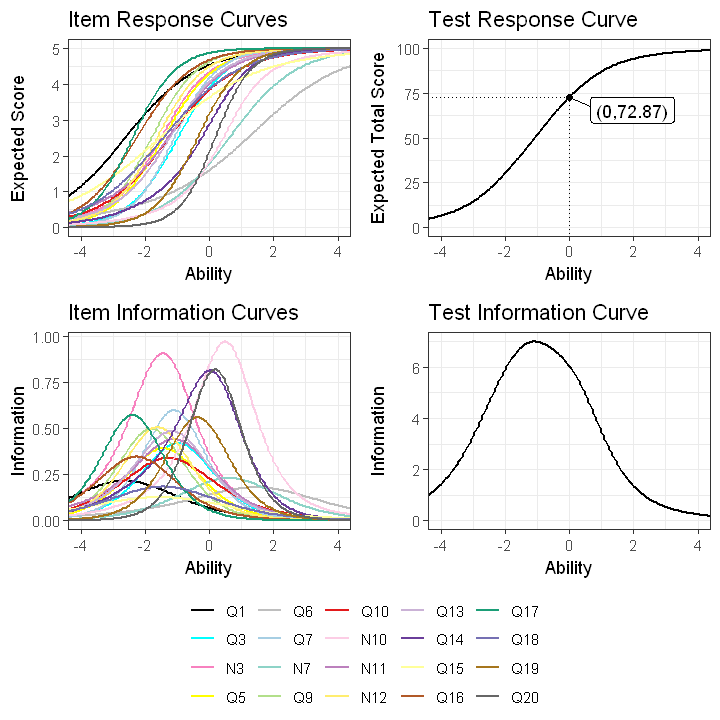

In [24]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IMPRV_17.pdf', width=7, onefile=F)
myggplot.mirt(fit_mdt3, multi, col=pal17)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

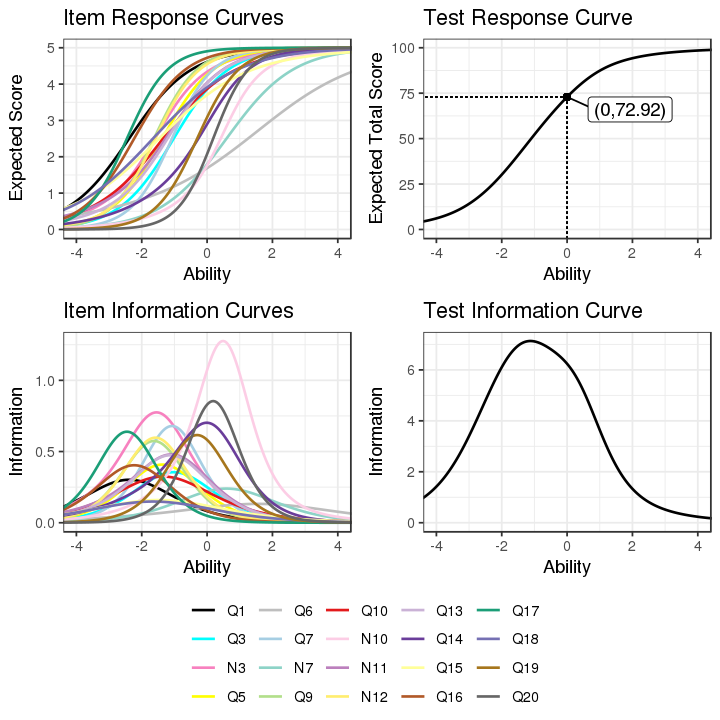

In [15]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IMPRV_17.pdf', width=7, onefile=F)
myggplot.mirt(fit_17, multi, col=pal17)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [25]:
sameq <- group_17[!grepl("N", qnum2017),]
addedq <- group_17[grepl('N',qnum2017),]
removedq <- group_pre17[!(paste0('Q',1:20) %in% qnum2017[!grepl('N',qnum2017)]),]

In [26]:
a <- lapply(coef(fit_mdt3)[as.character(sameq$Item)], function (x) {
    x[1, grep('d', colnames(x))]
})
b <- lapply(coef(fit_pre17_GPCM)[as.character(sameq$Item)], function (x) {
    x[1, grep('d', colnames(x))]
})

In [27]:
coef(fit_mdt3)

$Q1
           a1 ak0_1 ak1_1 ak2_1 d0     d1    d2
par     0.024     0    20    40  0 -0.262 2.579
CI_2.5  0.020    NA    NA    NA NA -0.522 2.379
CI_97.5 0.029    NA    NA    NA NA -0.002 2.779

$Q3
           a1 ak0_1 ak1_1 d0    d1
par     0.032     0    40  0 1.286
CI_2.5  0.028    NA    NA NA 1.147
CI_97.5 0.037    NA    NA NA 1.425

$N3
           a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 d0    d1    d2    d3    d4
par     0.070     0    10    20    30    40  0 1.281 2.488 3.122 4.361
CI_2.5  0.061    NA    NA    NA    NA    NA NA 0.956 2.119 2.715 3.960
CI_97.5 0.078    NA    NA    NA    NA    NA NA 1.605 2.856 3.530 4.763

$Q5
           a1 ak0_1 ak1_1 d0    d1
par     0.031     0    40  0 1.809
CI_2.5  0.027    NA    NA NA 1.647
CI_97.5 0.036    NA    NA NA 1.970

$Q6
           a1 ak0_1 ak1_1 ak2_1 ak3_1 d0     d1     d2     d3
par     0.027     0    16    24    40  0 -0.095 -4.220 -1.015
CI_2.5  0.023    NA    NA    NA    NA NA -0.196 -4.774 -1.160
CI_97.5 0.031    NA    NA    NA    NA NA  0.007 -3.666 -0.870

$Q7
           a1 ak0_1 ak1_1 ak2_1 d0     d1    d2
par     0.040     0    20    40  0 -1.009 1.775
CI_2.5  0.035    NA    NA    NA NA -1.257 1.600
CI_97.5 0.045    NA    NA    NA NA -0.761 1.951

$N7
           a1 ak0_1 ak1_1 d0     d1
par     0.024     0    40  0 -0.582
CI_2.5  0.021    NA    NA NA -0.691
CI_97.5 0.027    NA    NA NA -0.473

$Q9
           a1 ak0_1 ak1_1 d0    d1
par     0.035     0    40  0 2.550
CI_2.5  0.030    NA    NA NA 2.330
CI_97.5 0.041    NA    NA NA 2.771

$Q10
           a1 ak0_1 ak1_1 ak2_1 d0    d1    d2
par     0.035     0    20    40  0 0.838 1.806
CI_2.5  0.031    NA    NA    NA NA 0.664 1.633
CI_97.5 0.040    NA    NA    NA NA 1.012 1.978

$N10
           a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 ak6_1 ak7_1 ak8_1 d0     d1
par     0.072     0     5    10    15    20    25    30    35    40  0 -2.079
CI_2.5  0.064    NA    NA    NA    NA    NA    NA    NA    NA    NA NA -2.351
CI_97.5 0.080    NA    NA    NA    NA    NA    NA    NA    NA    NA NA -1.807
            d2     d3     d4     d5     d6     d7     d8
par      0.001 -1.048 -0.972 -1.319 -1.361 -1.922 -1.056
CI_2.5  -0.141 -1.252 -1.175 -1.543 -1.583 -2.177 -1.279
CI_97.5  0.144 -0.845 -0.769 -1.095 -1.139 -1.666 -0.832

$N11
           a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 d0     d1    d2     d3     d4
par     0.043     0     8    16    24    32    40  0 -0.801 1.346 -2.721 -0.904
CI_2.5  0.037    NA    NA    NA    NA    NA    NA NA -1.105 1.139 -3.529 -1.288
CI_97.5 0.048    NA    NA    NA    NA    NA    NA NA -0.498 1.554 -1.913 -0.521
           d5
par     2.598
CI_2.5  2.377
CI_97.5 2.818

$N12
           a1 ak0_1 ak1_1 ak2_1 ak3_1 d0     d1     d2    d3
par     0.037     0     8    32    40  0 -1.215 -0.234 2.467
CI_2.5  0.032    NA    NA    NA    NA NA -1.512 -0.514 2.253
CI_97.5 0.042    NA    NA    NA    NA NA -0.919  0.046 2.681

$Q13
           a1 ak0_1 ak1_1 ak2_1 ak3_1 d0    d1     d2    d3
par     0.041     0    16    24    40  0 0.664 -1.578 2.202
CI_2.5  0.036    NA    NA    NA    NA NA 0.472 -1.972 2.005
CI_97.5 0.046    NA    NA    NA    NA NA 0.856 -1.184 2.399

$Q14
           a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 ak5_1 d0     d1    d2     d3     d4
par     0.064     0     8    16    24    32    40  0 -0.868 1.347 -4.015 -1.274
CI_2.5  0.056    NA    NA    NA    NA    NA    NA NA -1.105 1.177 -5.126 -1.593
CI_97.5 0.071    NA    NA    NA    NA    NA    NA NA -0.631 1.517 -2.904 -0.955
           d5
par     1.175
CI_2.5  0.979
CI_97.5 1.371

$Q15
           a1 ak0_1 ak1_1 ak2_1 ak3_1 ak4_1 d0     d1     d2     d3    d4
par     0.020     0    10    20    30    40  0 -2.434 -0.373 -1.514 1.226
CI_2.5  0.016    NA    NA    NA    NA    NA NA -2.789 -0.538 -1.762 1.100
CI_97.5 0.023    NA    NA    NA    NA    NA NA -2.078 -0.209 -1.267 1.353

$Q16
           a1 ak0_1 ak1_1 d0    d1
par     0.029     0    40  0 2.681
CI_2.5  0.024    NA    NA NA 2.461
CI_97.5 0.035    NA    NA NA 2.901

$Q17
           a1 ak0_1 ak1_1 d

,Item,Type,DT17,Pre17
,<fct>,<fct>,<dbl>,<dbl>
1,Q1,A,0.0000000,0.0000000
1.1,Q1,A,-0.2617468,1.5657587
1.2,Q1,A,2.5789129,3.4197132
2,Q3,B,0.0000000,0.0000000
2.1,Q3,B,1.2857360,0.8665041
4,Q5,A,0.0000000,0.0000000


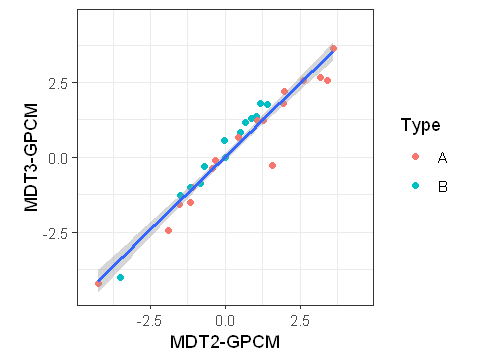

In [28]:
df <- data.frame(sameq[rep(seq_len(nrow(sameq)), sapply(a, length)),], 
                 DT17=unlist(a), Pre17=unlist(b))
head(df)
# pdf('../fig/IMPRV_SC_lm.pdf', width=7, height=5)
ggplot(df, aes(Pre17, DT17)) + 
    geom_point(aes(col=Type)) +
    geom_smooth(method='lm') + 
    coord_fixed(xlim=c(-4.5,4.5), ylim=c(-4.5,4.5)) + 
    labs(x='MDT2-GPCM', y='MDT3-GPCM')
# dev.off()

In [31]:
SC_lm <- lm(DT17 ~ Pre17, data=df)
summary(SC_lm)


Call:
lm(formula = DT17 ~ Pre17, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79607 -0.01658 -0.00513  0.19571  0.66417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.005125   0.061645   0.083    0.934    
Pre17       0.976647   0.039983  24.426   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4058 on 42 degrees of freedom
Multiple R-squared:  0.9342,	Adjusted R-squared:  0.9327 
F-statistic: 596.7 on 1 and 42 DF,  p-value: < 2.2e-16


In [32]:
coefs_SC <- mycoef.mirt(fit_mdt3)

In [33]:
coefs_SC$d <- lapply(mycoef.mirt(fit_mdt3)$d, function (x) {
                predict(SC_lm, data.frame(Pre17=x))
            })

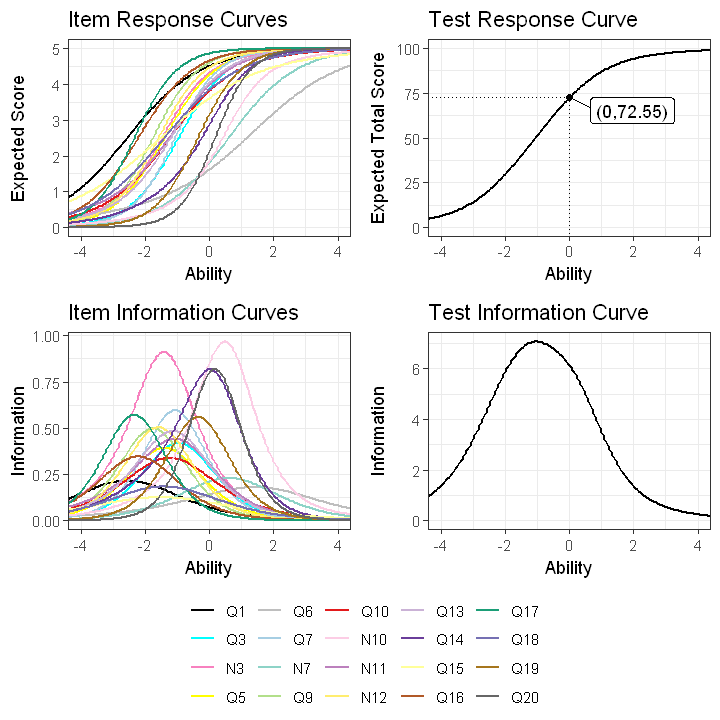

In [34]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IMPRV_17_SC.pdf', width=7, onefile=F)
myggplot.mirt(fit_mdt3, multi, coefs=coefs_SC, col=pal17)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [35]:
## ----- Section 4.4 FCIP -----
coef_b <- suppressMessages(mirt(round(MDT3clean[1:20]*multi), 1, itemtyp="gpcm", gpcm_mats = matsMDT3, pars="values"))
for (i in 1:nrow(sameq)) {
  coef_b[coef_b$item==as.character(sameq$Item[i]),]$value <- c(coef(fit_pre17_GPCM)[[as.character(sameq$Item[i])]])
  coef_b[coef_b$item==as.character(sameq$Item[i]),]$est <- FALSE
}

In [36]:
fit_mdt3_fcip <- suppressMessages(mirt(round(MDT3clean[1:20]*multi), 1, itemtyp="gpcm", gpcm_mats = matsMDT3, pars=coef_b))

Iteration: 14, Log-Lik: -29490.697, Max-Change: 0.00009


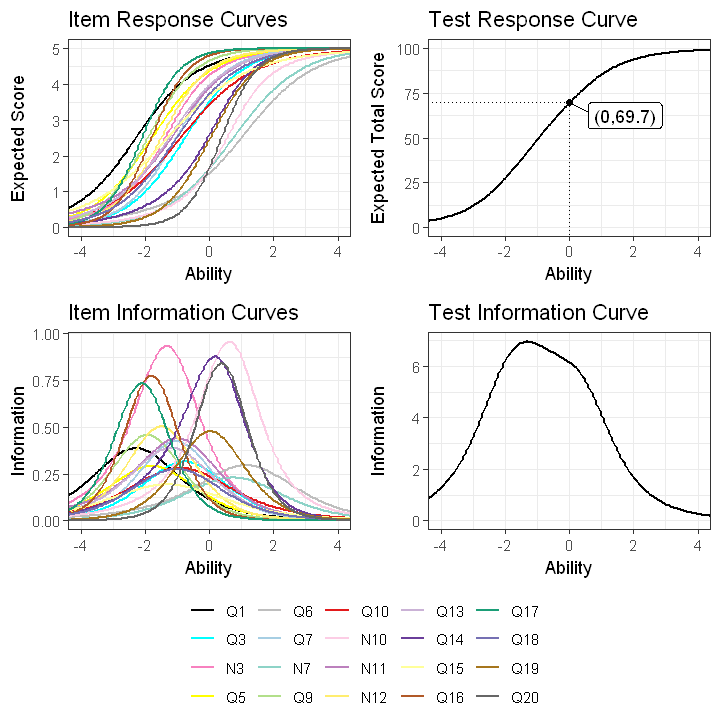

In [37]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IMPRV_17_FCIP.pdf', width=7, onefile=F)
myggplot.mirt(fit_mdt3_fcip, multi, col=pal17)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [38]:
pal_cf <- palette()[c(21:25,2,4,8,11,12)]

In [39]:
z <- seq(-5,5,length=201)

y1 <- myinfo.mirt(fit_mdt3_fcip)[,as.character(addedq$Item)]
y2 <- myinfo.mirt(fit_pre17_GPCM)[,as.character(removedq$Item)]
addedq_iif <- data.frame(z, y1)
removedq_iif <- data.frame(z, y2)
addedq_iif <- melt(addedq_iif, 'z')
removedq_iif <- melt(removedq_iif, 'z')
fcip_cf_iif <- rbind(addedq_iif, removedq_iif)

y3 <- myexpected.mirt(fit_mdt3_fcip)[,as.character(addedq$Item)]/multi
y4 <- myexpected.mirt(fit_pre17_GPCM)[,as.character(removedq$Item)]/multi
addedq_irf <- data.frame(z, y3)
removedq_irf <- data.frame(z, y4)
addedq_irf <- melt(addedq_irf, 'z')
removedq_irf <- melt(removedq_irf, 'z')
fcip_cf_irf <- rbind(addedq_irf, removedq_irf)

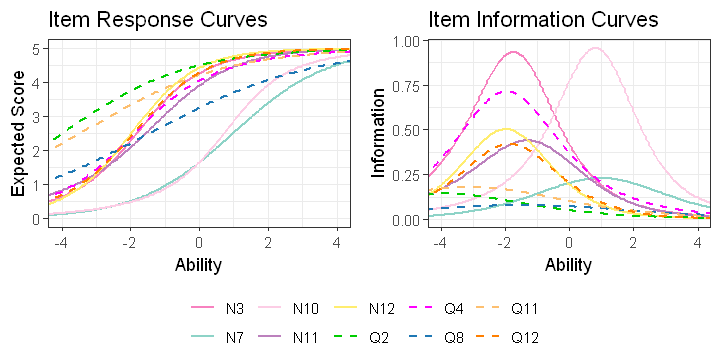

In [40]:
options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/IMPRV_FCIP_cf.pdf', width=7, height=4, onefile=F)
p1 <- ggplot(fcip_cf_irf, aes(z, value, col=variable)) + 
    geom_line(aes(lty=variable), size=0.75) + 
    scale_colour_manual(name='', values=pal_cf) + 
    scale_linetype_manual(name='', values=rep(c(1,2),each=5)) + 
    coord_cartesian(xlim=c(-4,4), ylim=c(0,5)) +
    labs(title='Item Response Curves', x='Ability', y='Expected Score')
p2 <- ggplot(fcip_cf_iif, aes(z, value, col=variable)) + 
    geom_line(aes(lty=variable), size=0.75) + 
    scale_colour_manual(name='', values=pal_cf) + 
    scale_linetype_manual(name='', values=rep(c(1,2),each=5)) + 
    coord_cartesian(xlim=c(-4,4)) +
    labs(title='Item Information Curves', x='Ability', y='Information')
ggarrange(p1, p2, common.legend = T, legend='bottom')
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [44]:
# LaTeX: tab:IMPRV_FCIP_expscore
irf_rm <- (myexpected.mirt(fit_pre17_GPCM, z=c(-2,0,2))[,as.character(removedq$Item)]/multi)[,c(2,5,1,3,4)]
irf_add <- (myexpected.mirt(fit_mdt3_fcip, z=c(-2,0,2))[,as.character(addedq$Item)]/multi)[,c(1,5,2,3,4)]
irf_rm[1,] <- irf_rm[1,]-irf_rm[2,]
irf_rm[3,] <- irf_rm[3,]-irf_rm[2,]
irf_rm <- rbind(irf_rm, irf_rm[3,]-irf_rm[1,])
irf_add[1,] <- irf_add[1,]-irf_add[2,]
irf_add[3,] <- irf_add[3,]-irf_add[2,]
irf_add <- rbind(irf_add, irf_add[3,]-irf_add[1,])
print(xtable(rbind(addmargins(t(irf_add), margin=1), addmargins(t(irf_rm), margin=1)), 
             digits=c(0,2,2,2,2), align=rep('c',5)))

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:42:19 2019
\begin{table}[ht]
\centering
\begin{tabular}{ccccc}
  \hline
 & 1 & 2 & 3 & 4 \\ 
  \hline
N3 & -2.69 & 4.27 & 0.62 & 3.31 \\ 
  N12 & -2.71 & 4.42 & 0.51 & 3.22 \\ 
  N7 & -1.32 & 1.66 & 2.20 & 3.52 \\ 
  N10 & -1.32 & 1.66 & 2.67 & 3.98 \\ 
  N11 & -2.33 & 3.91 & 0.93 & 3.26 \\ 
  Sum & -10.37 & 15.92 & 6.92 & 17.29 \\ 
  Q4 & -2.27 & 4.05 & 0.71 & 2.99 \\ 
  Q12 & -2.57 & 4.29 & 0.62 & 3.19 \\ 
  Q2 & -1.09 & 4.49 & 0.36 & 1.46 \\ 
  Q8 & -1.36 & 3.25 & 1.00 & 2.36 \\ 
  Q11 & -1.22 & 4.21 & 0.54 & 1.76 \\ 
  Sum.1 & -8.51 & 20.29 & 3.24 & 11.76 \\ 
   \hline
\end{tabular}
\end{table}


In [42]:
# LaTeX: tab:IMPRV_FCIP_summaryiif
majorinfo_each <- rbind(mysummaryinfo.mirt(fit_mdt3_fcip, which.items = grep("N", qnum2017)[c(1,5,2,3,4)], type='major'), 
                        mysummaryinfo.mirt(fit_pre17_GPCM, which.items = c(4,12,2,8,11), type='major'))
totalinfo_each <- rbind(mysummaryinfo.mirt(fit_mdt3_fcip, which.items = grep("N", qnum2017)[c(1,5,2,3,4)], type='total'), 
                        mysummaryinfo.mirt(fit_pre17_GPCM, which.items = c(4,12,2,8,11), type='total'))
print(xtable(cbind(majorinfo_each, totalinfo_each[2:4]), digits=c(0,rep(2,7))))

% latex table generated in R 3.5.1 by xtable 1.8-3 package
% Thu Jun 13 18:42:08 2019
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & MaxInfo.z & LowerMajor.info & UpperMajor.info & Major.info & Lower.info & Upper.info & Total.info \\ 
  \hline
N3 & -1.33 & 1.54 & 0.35 & 1.89 & 2.44 & 0.42 & 2.86 \\ 
  N12 & -1.51 & 0.80 & 0.15 & 0.95 & 1.31 & 0.17 & 1.48 \\ 
  N7 & 0.73 & 0.25 & 0.42 & 0.67 & 0.32 & 0.64 & 0.96 \\ 
  N10 & 0.61 & 0.75 & 1.52 & 2.28 & 0.95 & 1.91 & 2.86 \\ 
  N11 & -1.00 & 0.80 & 0.32 & 1.11 & 1.33 & 0.37 & 1.71 \\ 
  Q4 & -1.49 & 1.21 & 0.38 & 1.59 & 2.15 & 0.51 & 2.66 \\ 
  Q12 & -1.42 & 0.71 & 0.17 & 0.88 & 1.18 & 0.20 & 1.37 \\ 
  Q2 & -3.04 & 0.17 & 0.06 & 0.23 & 0.70 & 0.08 & 0.78 \\ 
  Q8 & -1.11 & 0.15 & 0.11 & 0.26 & 0.36 & 0.20 & 0.56 \\ 
  Q11 & -2.36 & 0.29 & 0.13 & 0.42 & 1.00 & 0.19 & 1.19 \\ 
   \hline
\end{tabular}
\end{table}


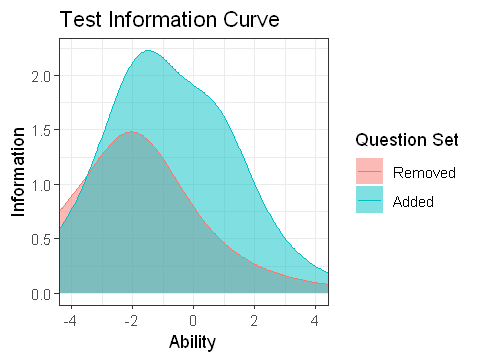

In [43]:
z <- seq(-5, 5, length=201)
fcip_cf_tif <- data.frame(z=z, 
                          Removed=rowSums(myinfo.mirt(fit_pre17_GPCM)[,c(2,4,8,11,12)]), 
                          Added=rowSums(myinfo.mirt(fit_mdt3_fcip)[,c(3,7,10,11,12)]))
fcip_cf_tif <- melt(fcip_cf_tif, "z")
# pdf("../fig/IMPRV_FCIP_tifcf.pdf", width=7, height=4)
ggplot(fcip_cf_tif, aes(z, value, fill=variable)) + 
    geom_area(position="identity", alpha=0.5) + 
    geom_line(aes(col=variable)) + 
    coord_cartesian(xlim=c(-4,4)) + 
    labs(title='Test Information Curve', x='Ability', y='Information', fill='Question Set', colour='Question Set')
# dev.off()

In [57]:
# LaTeX: tab:IRT_pre17_summarytif
majorinfo_sum <- mysummaryinfo.mirt(fit_mdt3_fcip, type='major', each=F)
totalinfo_sum <- mysummaryinfo.mirt(fit_mdt3_fcip, type='total', each=F)
print(xtable(cbind(majorinfo_sum, totalinfo_sum[2:4]), digits=c(0,rep(2,7))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:21:45 2019
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & MaxInfo.z & LowerMajor.info & UpperMajor.info & Major.info & Lower.info & Upper.info & Total.info \\ 
  \hline
1 & -1.32 & 13.31 & 8.11 & 21.42 & 21.73 & 9.94 & 31.67 \\ 
   \hline
\end{tabular}
\end{table}


In [58]:
# LaTeX: tab:IMPRV_FCIP_info
info_fcip <- rbind.fill(lapply(1:20, function (x) {
    myareainfo.mirt(fit_mdt3_fcip, zrange=c(-2,2), which.items=x)[c('Info', 'TotalInfo')]
}))
info_pre17 <- myareainfo.mirt(fit_pre17_GPCM, zrange=c(-2,2))
info_fcip_major <- data.frame(group_17, 
                              MajorInfo=info_fcip$Info)
info_fcip_total <- data.frame(group_17, 
                              TotalInfo=info_fcip$TotalInfo)
info_fcip_major$Prop <- info_fcip_major$MajorInfo / info_pre17$Info * 100
info_fcip_total$Prop <- info_fcip_total$TotalInfo / info_pre17$TotalInfo * 100
print(xtable(arrange(info_fcip_major, Prop)), include.rownames=F)
print(xtable(arrange(info_fcip_total, Prop)), include.rownames=F)
# Add manually
sum(info_fcip_major$Prop)
sum(info_fcip_total$Prop)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:23:40 2019
\begin{table}[ht]
\centering
\begin{tabular}{llrr}
  \hline
Item & Type & MajorInfo & Prop \\ 
  \hline
Q15 & A & 0.54 & 3.02 \\ 
  Q5 & A & 0.58 & 3.25 \\ 
  Q1 & A & 0.60 & 3.37 \\ 
  N7 & B & 0.67 & 3.77 \\ 
  Q9 & A & 0.70 & 3.92 \\ 
  Q18 & A & 0.73 & 4.09 \\ 
  Q17 & A & 0.78 & 4.35 \\ 
  Q10 & B & 0.82 & 4.58 \\ 
  Q6 & A & 0.83 & 4.62 \\ 
  Q3 & B & 0.85 & 4.75 \\ 
  Q13 & A & 0.95 & 5.29 \\ 
  N12 & A & 0.95 & 5.32 \\ 
  Q7 & B & 1.00 & 5.62 \\ 
  Q16 & A & 1.02 & 5.71 \\ 
  N11 & C & 1.11 & 6.23 \\ 
  Q19 & B & 1.22 & 6.81 \\ 
  Q20 & B & 1.72 & 9.64 \\ 
  N3 & A & 1.89 & 10.57 \\ 
  Q14 & B & 2.17 & 12.11 \\ 
  N10 & B & 2.28 & 12.72 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:23:40 2019
\begin{table}[ht]
\centering
\begin{tabular}{llrr}
  \hline
Item & Type & TotalInfo & Prop \\ 
  \hline
N7 & B & 0.96 & 3.38 \\ 
  Q15 

[1] 119.7366

[1] 111.6176

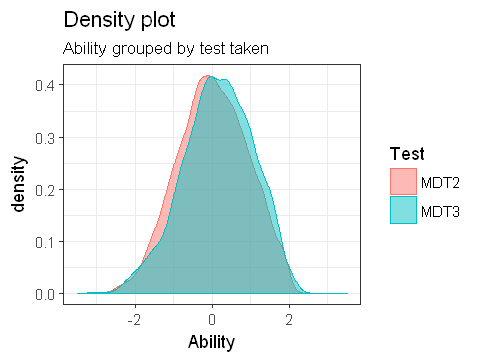

In [59]:
eap_pre17 <- as.data.frame(fscores(fit_pre17_GPCM, method='EAP', full.scores.SE = T))
eap_mdt3_fcip <- as.data.frame(fscores(fit_mdt3_fcip, method='EAP', full.scores.SE = T))
eap_pre17$Test <- 'MDT2'
eap_mdt3_fcip$Test <- 'MDT3'
eap.df <- rbind(eap_pre17, eap_mdt3_fcip)
eap.df$Test <- factor(eap.df$Test, levels=c('MDT2', 'MDT3'))
# pdf("../fig/IMPRV_FCIP_eap.pdf", width=7, height=4)
ggplot(eap.df, aes(F1, colour=Test, fill=Test)) + 
    geom_density(alpha=0.5) + 
    scale_x_continuous(limits=c(-3.5,3.5)) +
    labs(title="Density plot", 
         subtitle="Ability grouped by test taken", 
         x="Ability")
# dev.off()

In [60]:
eap.dsc <- rbind(describe(eap.df[eap.df$Test=='MDT2',]$F1), 
                 describe(eap.df[eap.df$Test=='MDT3',]$F1))[,c(2,3,4,8,9,11,12)]
rownames(eap.dsc) <- c('MDT2', 'MDT3')
print(xtable(eap.dsc, digits=c(0,0,2,2,2,2,2,2)))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:24:47 2019
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & n & mean & sd & min & max & skew & kurtosis \\ 
  \hline
MDT2 & 3248 & 0.02 & 0.90 & -2.73 & 1.86 & -0.09 & -0.48 \\ 
  MDT3 & 2028 & 0.16 & 0.90 & -2.98 & 2.05 & -0.26 & -0.28 \\ 
   \hline
\end{tabular}
\end{table}


In [61]:
ks.test(eap_pre17[,'F1'], eap_mdt3_fcip[,'F1'])

Warning message in ks.test(eap_pre17[, "F1"], eap_mdt3_fcip[, "F1"]):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  eap_pre17[, "F1"] and eap_mdt3_fcip[, "F1"]
D = 0.074415, p-value = 1.977e-06
alternative hypothesis: two-sided


In [62]:
## ----- Section 4.5 Concurrent -----
mdt_cp <- as.data.frame(testEquatingData(list(mdt_clean[1:20], MDT3clean[1:20])))

In [63]:
catg_cp <- lapply(mdt_cp, function (x) {sort(unique(x))})
mats_cp <- sapply(catg_cp, function (x) {
  as.matrix(round(x * multi))
})
pal_cp <- palette()[c(1,3,5,6,7,9,10,13:20,2,4,8,11,12,21:25)]

In [64]:
fit_mdt3_cp <- suppressMessages(mirt(round(as.matrix(mdt_cp)*multi), 1, itemtyp="gpcm", gpcm_mats = mats_cp))

Iteration: 51, Log-Lik: -75510.352, Max-Change: 0.00003


In [65]:
myggplot.mirt.cp <- function (x, multi = 1, zrange = c(-5, 5), z = seq(zrange[1], zrange[2], length = 201), coefs=NULL, find.avg = FALSE, labels = NULL, legend = FALSE, xlab="Ability", cx = "top", cy = NULL, ncol = 1, bty = "n", col = palette(), lty = 1, pch, lwd = 1, cex = par("cex"), ...) {
    nitems <- extract.mirt(x, 'nitems')
    z0 <- which(z==0)
    
    y1 <- myexpected.mirt(x, zrange, coefs=coefs)/multi
    y2 <- myinfo.mirt(x, zrange, coefs=coefs)
    
    irf.df <- data.frame(z, y1)
    iif.df <- data.frame(z, y2)
        
    irf.df <- melt(irf.df, 'z')
    iif.df <- melt(iif.df, 'z')
    
    trf.df <- data.frame(z, old=rowSums(y1[,c(1:20)]), new=rowSums(y1[,c(1:15,21:25)]))
    tif.df <- data.frame(z, old=rowSums(y2[,c(1:20)]), new=rowSums(y2[,c(1:15,21:25)]))
    
    trf.df <- melt(trf.df, 'z')
    tif.df <- melt(tif.df, 'z')

    p1 <- ggplot(irf.df, aes(z, value, col=variable)) + 
            geom_line(size=0.75) + 
            scale_color_manual(values=col, name='') +
            coord_cartesian(ylim=c(0,5), xlim=c(-4,4)) +
            labs(title='Item Response Curves', x='Ability', y='Expected Score')
    p2 <- ggplot(trf.df, aes(z, value, col=variable)) + 
            geom_line(size=0.75) +
            geom_point(data=subset(trf.df, z==0), aes(z, value, col=variable)) + 
#             geom_segment(aes(x=0, y=sums[z0], xend=0, yend=-5), size=0.25, linetype=3) +
#             geom_segment(aes(x=0, y=sums[z0], xend=-5, yend=sums[z0]), size=0.25, linetype=3) + 
            geom_label_repel(data=subset(trf.df, z==0), label=paste0('(',0,',',round(subset(trf.df, z==0)$value,2),')'), hjust=-0.25, vjust=1, show.legend=F) + 
            coord_cartesian(ylim=c(0,100), xlim=c(-4,4)) +
            labs(title='Test Response Curve', x='Ability', y='Expected Total Score', col='MDT') + 
            geom_label(aes(3.3, 19, label='MDT2', col=factor('old'))) + 
            geom_label(aes(3.3, 5, label='MDT3', col=factor('new')))
    p3 <- ggplot(iif.df, aes(z, value, col=variable)) +
            geom_line(size=0.75) +
            scale_color_manual(values=col) + 
            scale_y_continuous(limits=c(0, NA)) +
            coord_cartesian(xlim=c(-4,4)) +
            labs(title='Item Information Curves', x='Ability', y='Information')
    p4 <- ggplot(tif.df, aes(z, value, col=variable)) +
            geom_line(size=0.75) + 
            scale_y_continuous(limits=c(0, NA)) +
            coord_cartesian(xlim=c(-4,4)) +
            labs(title='Test Information Curve', x='Ability', y='Information', col='MDT') + 
            geom_label(aes(3.3, 6.5, label='MDT2', col=factor('old'))) + 
            geom_label(aes(3.3, 5.5, label='MDT3', col=factor('new')))

    ggarrange(p1, p2, p3, p4, ncol=2, nrow=2, common.legend=T, legend='bottom', align='v')
}

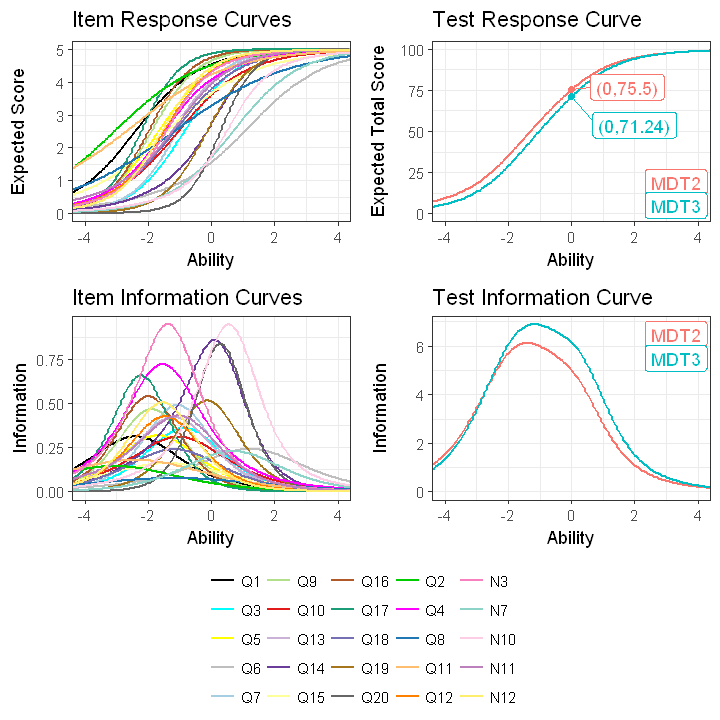

In [66]:
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/IMPRV_17_CP.pdf', width=7, onefile=F)
myggplot.mirt.cp(fit_mdt3_cp, multi, col=pal_cp)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [67]:
z <- seq(-5,5,length=201)

y1 <- myinfo.mirt(fit_mdt3_cp)[,16:20]
y2 <- myinfo.mirt(fit_mdt3_cp)[,21:25]
oldtest_iif <- data.frame(z, y1)
newtest_iif <- data.frame(z, y2)
oldtest_iif <- melt(oldtest_iif, 'z')
newtest_iif <- melt(newtest_iif, 'z')
cp_iif <- rbind(newtest_iif, oldtest_iif)

y3 <- myexpected.mirt(fit_mdt3_cp)[,16:20]/multi
y4 <- myexpected.mirt(fit_mdt3_cp)[,21:25]/multi
oldtest_irf <- data.frame(z, y3)
newtest_irf <- data.frame(z, y4)
oldtest_irf <- melt(oldtest_irf, 'z')
newtest_irf <- melt(newtest_irf, 'z')
cp_irf <- rbind(newtest_irf, oldtest_irf)

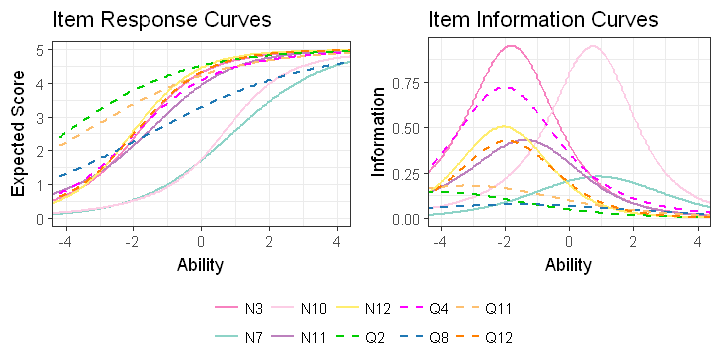

In [68]:
options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/IMPRV_CP_cf.pdf', width=7, height=4, onefile=F)
p1 <- ggplot(cp_irf, aes(z, value, col=variable)) + 
    geom_line(aes(lty=variable), size=0.75) + 
    scale_colour_manual(name='', values=pal_cf) + 
    scale_linetype_manual(name='', values=rep(c(1,2),each=5)) + 
    coord_cartesian(xlim=c(-4,4), ylim=c(0,5)) +
    labs(title='Item Response Curves', x='Ability', y='Expected Score')
p2 <- ggplot(cp_iif, aes(z, value, col=variable)) + 
    geom_line(aes(lty=variable), size=0.75) + 
    scale_colour_manual(name='', values=pal_cf) + 
    scale_linetype_manual(name='', values=rep(c(1,2),each=5)) + 
    coord_cartesian(xlim=c(-4,4)) +
    labs(title='Item Information Curves', x='Ability', y='Information')
ggarrange(p1, p2, common.legend = T, legend='bottom')
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [69]:
# LaTeX: tab:IMPRV_CP_info
info_cp <- rbind.fill(lapply(1:25, function (x) {
    myareainfo.mirt(fit_mdt3_cp, zrange=c(-2,2), which.items=x)[c('Info', 'TotalInfo')]
}))
group_mdt3_cp <- rbind(group_pre17[-c(2,4,8,11,12),], group_pre17[c(2,4,8,11,12),], group_17[c(3,7,10,11,12),])
info_fcip_major <- data.frame(group_mdt3_cp, 
                              MajorInfo=info_cp$Info, 
                              Prop=prop.table(info_cp$Info)*100)
info_fcip_total <- data.frame(group_mdt3_cp, 
                              TotalInfo=info_cp$TotalInfo, 
                              Prop=prop.table(info_cp$TotalInfo)*100)
print(xtable(arrange(info_fcip_major, Prop)), include.rownames=F)
print(xtable(arrange(info_fcip_total, Prop)), include.rownames=F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:28:23 2019
\begin{table}[ht]
\centering
\begin{tabular}{llrr}
  \hline
Item & Type & MajorInfo & Prop \\ 
  \hline
Q2 & A & 0.22 & 0.92 \\ 
  Q8 & A & 0.26 & 1.06 \\ 
  Q11 & A & 0.41 & 1.68 \\ 
  Q15 & A & 0.46 & 1.90 \\ 
  Q1 & A & 0.48 & 1.97 \\ 
  Q18 & A & 0.63 & 2.62 \\ 
  Q5 & A & 0.65 & 2.67 \\ 
  Q17 & A & 0.66 & 2.71 \\ 
  N7 & B & 0.68 & 2.81 \\ 
  Q6 & A & 0.70 & 2.89 \\ 
  Q9 & A & 0.72 & 2.98 \\ 
  Q16 & A & 0.73 & 3.00 \\ 
  Q10 & B & 0.86 & 3.55 \\ 
  Q12 & A & 0.87 & 3.58 \\ 
  Q3 & B & 0.92 & 3.80 \\ 
  N12 & A & 0.93 & 3.84 \\ 
  Q13 & A & 1.01 & 4.15 \\ 
  N11 & C & 1.08 & 4.46 \\ 
  Q7 & B & 1.10 & 4.55 \\ 
  Q19 & B & 1.28 & 5.29 \\ 
  Q4 & A & 1.57 & 6.46 \\ 
  Q20 & B & 1.73 & 7.14 \\ 
  N3 & A & 1.88 & 7.76 \\ 
  Q14 & B & 2.14 & 8.82 \\ 
  N10 & B & 2.28 & 9.38 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:28:23 2019
\

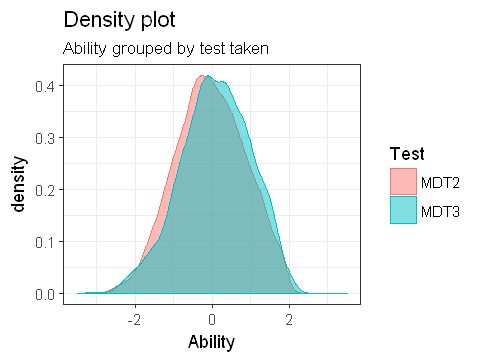

In [70]:
eap.df <- as.data.frame(fscores(fit_mdt3_cp, method='EAP', full.scores.SE=T))
eap.df$Test <- rep(c('MDT2', 'MDT3'), c(nrow(mdt_clean), nrow(MDT3clean)))
# eap.df$Test <- factor(eap.df$Year, levels=c('MDT2', 'MDT3')) # reorder factors
# pdf("../fig/IMPRV_CP_eap.pdf", width=7, height=4)
ggplot(eap.df, aes(F1, colour=Test, fill=Test)) + 
    geom_density(alpha=0.5) + 
    scale_x_continuous(limits=c(-3.5,3.5)) +
    labs(title="Density plot", 
         subtitle="Ability grouped by test taken", 
         x="Ability")
# dev.off()

In [71]:
eap.dsc <- rbind(describe(eap.df[eap.df$Test=='MDT2',]$F1), 
                 describe(eap.df[eap.df$Test=='MDT3',]$F1))[,c(2,3,4,8,9,11,12)]
rownames(eap.dsc) <- c('MDT2', 'MDT3')
print(xtable(eap.dsc, digits=c(0,0,2,2,2,2,2,2)))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Tue Feb 05 12:30:02 2019
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & n & mean & sd & min & max & skew & kurtosis \\ 
  \hline
MDT2 & 3248 & -0.04 & 0.90 & -2.79 & 1.81 & -0.06 & -0.48 \\ 
  MDT3 & 2028 & 0.10 & 0.90 & -3.03 & 2.00 & -0.24 & -0.27 \\ 
   \hline
\end{tabular}
\end{table}
